In [23]:
import pandas as pd
import numpy as np
from scipy.special import ndtri
from matplotlib import pyplot as plt

In [2]:
# Loading the csv file into data frame
df=pd.read_csv("C:/Users/alamt/merged_exp_contains_anomalies.csv")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag
0,745,1.7957,6.1964,508.57,875.40,0.43922,1.5473,57.021,56.914,1,0
1,746,1.7851,6.1508,503.90,867.18,0.43947,1.3525,53.658,58.856,1,0
2,747,1.7760,6.1173,499.62,860.56,0.42528,1.3391,52.551,69.101,1,0
3,748,1.7641,6.0799,494.07,851.51,0.42802,1.3679,51.228,75.935,1,0
4,749,1.7525,6.0333,486.73,840.86,0.40701,1.3128,47.228,72.784,1,0


In [3]:
df.columns = ["Unnamed","X1","X2","X3","X4","X5","X6","X7","X8","Sds_Armed","Anomaly_Tag"]
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag
0,745,1.7957,6.1964,508.57,875.40,0.43922,1.5473,57.021,56.914,1,0
1,746,1.7851,6.1508,503.90,867.18,0.43947,1.3525,53.658,58.856,1,0
2,747,1.7760,6.1173,499.62,860.56,0.42528,1.3391,52.551,69.101,1,0
3,748,1.7641,6.0799,494.07,851.51,0.42802,1.3679,51.228,75.935,1,0
4,749,1.7525,6.0333,486.73,840.86,0.40701,1.3128,47.228,72.784,1,0


In [20]:
#sorting the values
df=df.sort_values(by=['X1','X2','X3','X4','X5','X6','X7','X8'], ascending=True).reset_index()
df.head()

,index,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag
0,7003,42561,0.29916,0.80175,18.246,2.1808,0.23119,0.74448,16.434,2.0543,1,0
1,7002,42560,0.29952,0.80114,18.316,2.1830,0.25310,0.78113,16.162,2.0623,1,0
2,7001,42559,0.30029,0.80172,18.398,2.1830,0.28739,0.82888,16.165,2.0377,1,0
3,7000,42558,0.30158,0.80464,18.437,2.1801,0.30005,0.86829,16.255,1.9606,1,0
4,6999,42557,0.30209,0.80703,18.436,2.1795,0.30055,0.93291,16.647,1.9463,1,0


In [22]:
#Dividing the Standard Normal Distribution i.e. theoretical distribution into n+1 equal parts
df["count"]=df.index+1
df.head()

,index,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag,count
0,7003,42561,0.29916,0.80175,18.246,2.1808,0.23119,0.74448,16.434,2.0543,1,0,1
1,7002,42560,0.29952,0.80114,18.316,2.1830,0.25310,0.78113,16.162,2.0623,1,0,2
2,7001,42559,0.30029,0.80172,18.398,2.1830,0.28739,0.82888,16.165,2.0377,1,0,3
3,7000,42558,0.30158,0.80464,18.437,2.1801,0.30005,0.86829,16.255,1.9606,1,0,4
4,6999,42557,0.30209,0.80703,18.436,2.1795,0.30055,0.93291,16.647,1.9463,1,0,5


In [24]:
n_rows=df.shape[0]

In [26]:
# Calculating the percentile area
df["percentile_area"]= (df["count"])/n_rows
df.head()

,index,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag,count,percentile_area
0,7003,42561,0.29916,0.80175,18.246,2.1808,0.23119,0.74448,16.434,2.0543,1,0,1,0.000022
1,7002,42560,0.29952,0.80114,18.316,2.1830,0.25310,0.78113,16.162,2.0623,1,0,2,0.000044
2,7001,42559,0.30029,0.80172,18.398,2.1830,0.28739,0.82888,16.165,2.0377,1,0,3,0.000066
3,7000,42558,0.30158,0.80464,18.437,2.1801,0.30005,0.86829,16.255,1.9606,1,0,4,0.000088
4,6999,42557,0.30209,0.80703,18.436,2.1795,0.30055,0.93291,16.647,1.9463,1,0,5,0.000110


In [27]:
# Finding the Z value for each region
df["z_theoretical"]=ndtri(df["percentile_area"])

In [36]:
# Z Score is calculated by iterating over each row and subtracting it from the mean and dividing it with the standard deviation
df["z_actual_X1"]= (df["X1"]-df["X1"].mean())/df["X1"].std(ddof=0)

In [37]:
df.head()

,index,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,Sds_Armed,Anomaly_Tag,count,percentile_area,z_theoretical,z_actual,z_actual_X1
0,7003,42561,0.29916,0.80175,18.246,2.1808,0.23119,0.74448,16.434,2.0543,1,0,1,0.000022,-4.086279,-1.392866,-1.392866
1,7002,42560,0.29952,0.80114,18.316,2.1830,0.25310,0.78113,16.162,2.0623,1,0,2,0.000044,-3.922405,-1.391377,-1.391377
2,7001,42559,0.30029,0.80172,18.398,2.1830,0.28739,0.82888,16.165,2.0377,1,0,3,0.000066,-3.823625,-1.388193,-1.388193
3,7000,42558,0.30158,0.80464,18.437,2.1801,0.30005,0.86829,16.255,1.9606,1,0,4,0.000088,-3.752130,-1.382858,-1.382858
4,6999,42557,0.30209,0.80703,18.436,2.1795,0.30055,0.93291,16.647,1.9463,1,0,5,0.000110,-3.695826,-1.380749,-1.380749


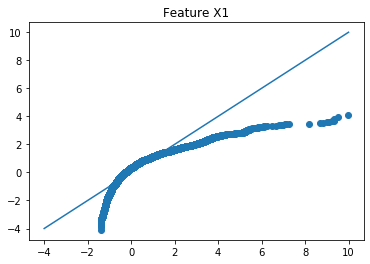

In [39]:
# Plotting the scatter plot 
plt.scatter(df.z_actual_X1, df.z_theoretical)
plt.title('Feature X1')
plt.plot([-4,-2,0,2,4,6,8,10],[-4,-2,0,2,4,6,8,10])

In [44]:
df["z_actual_X2"]= (df["X2"]-df["X2"].mean())/df["X2"].std(ddof=0)

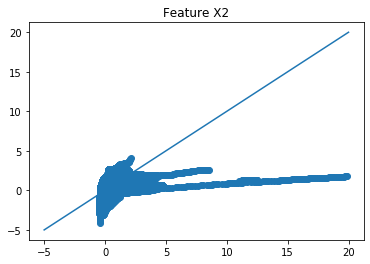

In [46]:
plt.scatter(df.z_actual_X2, df.z_theoretical)
plt.title('Feature X2')
plt.plot([-5,0,5,10,15,20],[-5,0,5,10,15,20])

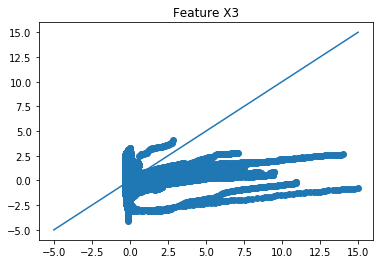

In [49]:
df["z_actual_X3"]= (df["X3"]-df["X3"].mean())/df["X3"].std(ddof=0)
plt.scatter(df.z_actual_X3, df.z_theoretical)
plt.title('Feature X3')
plt.plot([-5,0,5,10,15],[-5,0,5,10,15])

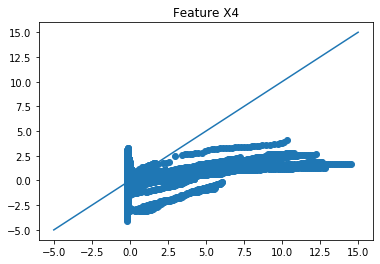

In [50]:
df["z_actual_X4"]= (df["X4"]-df["X4"].mean())/df["X4"].std(ddof=0)
plt.scatter(df.z_actual_X4, df.z_theoretical)
plt.title('Feature X4')
plt.plot([-5,0,5,10,15],[-5,0,5,10,15])

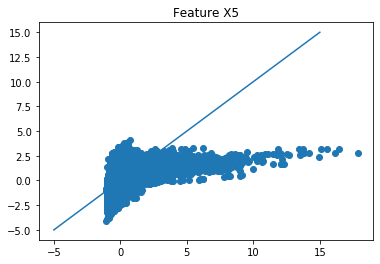

In [51]:
df["z_actual_X5"]= (df["X5"]-df["X5"].mean())/df["X5"].std(ddof=0)
plt.scatter(df.z_actual_X5, df.z_theoretical)
plt.title('Feature X5')
plt.plot([-5,0,5,10,15],[-5,0,5,10,15])

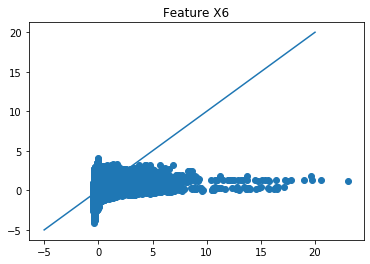

In [54]:
df["z_actual_X6"]= (df["X6"]-df["X6"].mean())/df["X6"].std(ddof=0)
plt.scatter(df.z_actual_X6, df.z_theoretical)
plt.title('Feature X6')
plt.plot([-5,0,5,10,15,20],[-5,0,5,10,15,20])

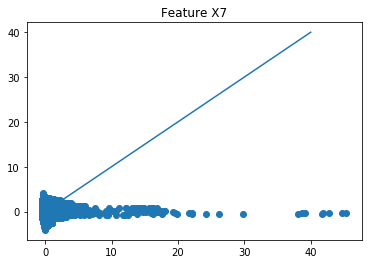

In [55]:
df["z_actual_X7"]= (df["X7"]-df["X7"].mean())/df["X7"].std(ddof=0)
plt.scatter(df.z_actual_X7, df.z_theoretical)
plt.title('Feature X7')
plt.plot([0,10,20,30,40],[0,10,20,30,40])

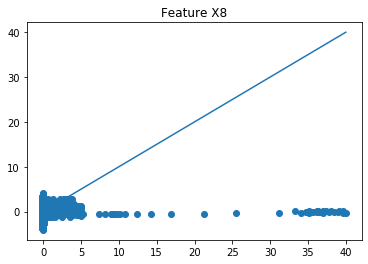

In [56]:
df["z_actual_X8"]= (df["X8"]-df["X8"].mean())/df["X8"].std(ddof=0)
plt.scatter(df.z_actual_X8, df.z_theoretical)
plt.title('Feature X8')
plt.plot([0,10,20,30,40],[0,10,20,30,40])

In [60]:
df['log_value_X1'] = np.log(df['X1'])
df.head()

,index,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,...,z_actual_X1,z_actual_X2,z_actual_X3,z_actual_X4,z_actual_X5,z_actual_X6,z_actual_X7,z_actual_X8,log_value_X1,z_actual_X1_log
0,7003,42561,0.29916,0.80175,18.246,2.1808,0.23119,0.74448,16.434,2.0543,...,-1.392866,-0.433868,-0.131546,-0.177616,-1.053955,-0.399030,-0.018743,-0.103176,-1.206777,-2.141636
1,7002,42560,0.29952,0.80114,18.316,2.1830,0.25310,0.78113,16.162,2.0623,...,-1.391377,-0.434120,-0.130515,-0.177588,-0.993559,-0.382755,-0.027760,-0.102755,-1.205574,-2.137938
2,7001,42559,0.30029,0.80172,18.398,2.1830,0.28739,0.82888,16.165,2.0377,...,-1.388193,-0.433881,-0.129307,-0.177588,-0.899038,-0.361551,-0.027660,-0.104049,-1.203007,-2.130044
3,7000,42558,0.30158,0.80464,18.437,2.1801,0.30005,0.86829,16.255,1.9606,...,-1.382858,-0.432675,-0.128733,-0.177624,-0.864140,-0.344050,-0.024677,-0.108104,-1.198720,-2.116864
4,6999,42557,0.30209,0.80703,18.436,2.1795,0.30055,0.93291,16.647,1.9463,...,-1.380749,-0.431687,-0.128748,-0.177632,-0.862762,-0.315354,-0.011682,-0.108856,-1.197030,-2.111669


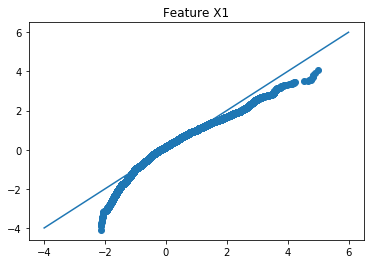

In [63]:
df["z_actual_X1_log"]= (df["log_value_X1"]-df["log_value_X1"].mean())/df["log_value_X1"].std(ddof=0)
plt.scatter(df.z_actual_X1_log, df.z_theoretical)
plt.title('Feature X1')
plt.plot([-4,-2,0,2,4,6],[-4,-2,0,2,4,6])

In [61]:
df['log_value_X2'] = np.log(df['X2'])
df['log_value_X3'] = np.log(df['X3'])
df['log_value_X4'] = np.log(df['X4'])
df['log_value_X5'] = np.log(df['X5'])
df['log_value_X6'] = np.log(df['X6'])
df['log_value_X7'] = np.log(df['X7'])
df['log_value_X8'] = np.log(df['X8'])

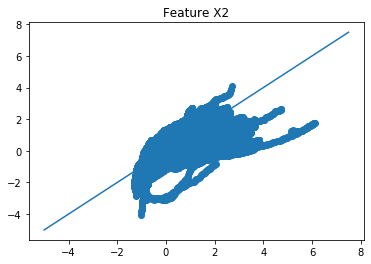

In [64]:
df["z_actual_X2_log"]= (df["log_value_X2"]-df["log_value_X2"].mean())/df["log_value_X2"].std(ddof=0)
plt.scatter(df.z_actual_X2_log, df.z_theoretical)
plt.title('Feature X2')
plt.plot([-5,-2.5,0,2.5,5.5,7.5],[-5,-2.5,0,2.5,5.5,7.5])

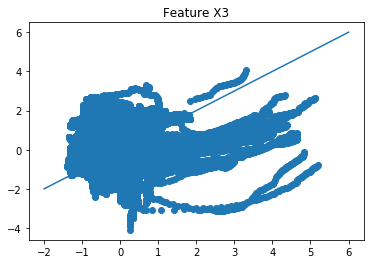

In [66]:
df["z_actual_X3_log"]= (df["log_value_X3"]-df["log_value_X3"].mean())/df["log_value_X3"].std(ddof=0)
plt.scatter(df.z_actual_X3_log, df.z_theoretical)
plt.title('Feature X3')
plt.plot([-2,0,2,4,6],[-2,0,2,4,6])

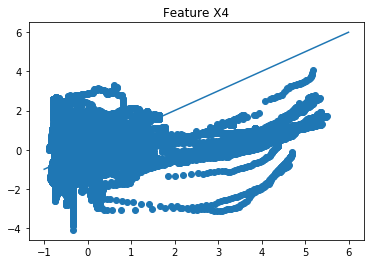

In [68]:
df["z_actual_X4_log"]= (df["log_value_X4"]-df["log_value_X4"].mean())/df["log_value_X4"].std(ddof=0)
plt.scatter(df.z_actual_X4_log, df.z_theoretical)
plt.title('Feature X4')
plt.plot([-1,0,1,2,3,4,5,6],[-1,0,1,2,3,4,5,6])

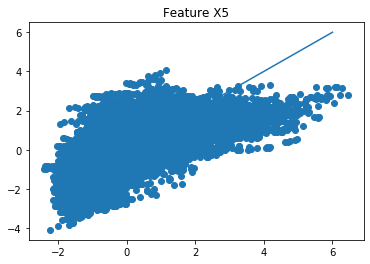

In [70]:
df["z_actual_X5_log"]= (df["log_value_X5"]-df["log_value_X5"].mean())/df["log_value_X5"].std(ddof=0)
plt.scatter(df.z_actual_X5_log, df.z_theoretical)
plt.title('Feature X5')
plt.plot([-2,0,2,4,6],[-2,0,2,4,6])

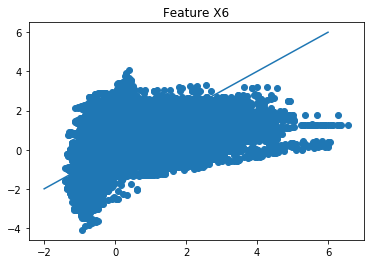

In [71]:
df["z_actual_X6_log"]= (df["log_value_X6"]-df["log_value_X6"].mean())/df["log_value_X6"].std(ddof=0)
plt.scatter(df.z_actual_X6_log, df.z_theoretical)
plt.title('Feature X6')
plt.plot([-2,0,2,4,6],[-2,0,2,4,6])

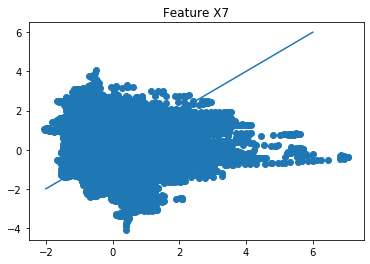

In [72]:
df["z_actual_X7_log"]= (df["log_value_X7"]-df["log_value_X7"].mean())/df["log_value_X7"].std(ddof=0)
plt.scatter(df.z_actual_X7_log, df.z_theoretical)
plt.title('Feature X7')
plt.plot([-2,0,2,4,6],[-2,0,2,4,6])

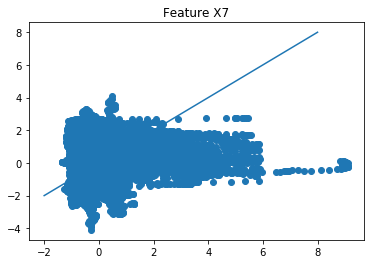

In [74]:
df["z_actual_X8_log"]= (df["log_value_X8"]-df["log_value_X8"].mean())/df["log_value_X8"].std(ddof=0)
plt.scatter(df.z_actual_X8_log, df.z_theoretical)
plt.title('Feature X7')
plt.plot([-2,0,2,4,6,8],[-2,0,2,4,6,8])